In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
df_1 = pd.read_csv("Client_Profiles.txt")
df_2 = pd.read_csv("Digital_Footprints_pt1.txt")
df_3 = pd.read_csv("Digital_Footprints_pt2.txt")
df_4 = pd.read_csv("Experiment_Roster.txt")

In [83]:
df_1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [84]:
df_1.shape, df_2.shape, df_3.shape, df_4.shape

((70609, 9), (343141, 5), (412264, 5), (70609, 2))

In [85]:
df_1.columns, df_2.columns, df_3.columns, df_4.columns

(Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
        'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
       dtype='object'),
 Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object'),
 Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object'),
 Index(['client_id', 'Variation'], dtype='object'))

In [86]:
df_1.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [87]:
df_1.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [88]:
df_1["gendr"].unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [89]:
df_1 = df_1.dropna()


In [91]:
df_2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [92]:
df_2.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [93]:
df_2["date_time"] = pd.to_datetime(df_2["date_time"])


In [94]:
df_2.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [95]:
df_3.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [96]:
df_3["date_time"] = pd.to_datetime(df_3["date_time"])


In [97]:
df_3.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [98]:
digital_footprints_df = pd.concat([df_2, df_3])

In [99]:
digital_footprints_df.shape

(755405, 5)

In [106]:
df_4.head()

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [102]:
df_4.dtypes

client_id     int64
Variation    object
dtype: object

In [103]:
df_4.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [104]:
df_4 = df_4.dropna()


In [ ]:
df_4 = df_4.rename(columns={"Variation": "variation"})

In [108]:
merged_df = pd.merge(digital_footprints_df, df_4, on='client_id')


In [109]:
merged_df.shape

(321309, 6)

In [110]:
merged_df.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
variation       0
dtype: int64

In [151]:
merged_df.shape

(321309, 6)

In [150]:
merged_df["process_step"].value_counts()

process_step
start      104082
step_1      68436
step_2      56875
step_3      48689
confirm     43227
Name: count, dtype: int64

##### TEST AND CONTROL DF

In [ ]:
test_filter_V2 = merged_df.loc[merged_df["variation"] == "Test"]
test_control_V2 = merged_df.loc[merged_df["variation"] == "Control"]

##### FREQUENCY BY STEP FOR TEST GROUP

In [ ]:

df_last_step_test_V2 = test_filter_V2.sort_values(by=['client_id', 'date_time']) 
df_last_step_test_V2 = df_last_step_test_V2.groupby('client_id').last().reset_index()

df_last_step_test_frequency_V2 = df_last_step_test_V2["process_step"].value_counts()
df_last_step_test_frequency_V2 = df_last_step_test_frequency_V2.reset_index()
df_last_step_test_frequency_V2.columns = ['step', 'frequency']

df_last_step_test_frequency_V2.head()

,step,frequency
0,confirm,18147
1,start,5577
2,step_1,1654
3,step_3,1020
4,step_2,570


##### FREQUENCY BY STEP FOR CONTROL GROUP

In [158]:
df_last_step_control_V2 = test_control_V2.sort_values(by=['client_id', 'date_time']) 
df_last_step_control_V2 = df_last_step_control_V2.groupby('client_id').last().reset_index()

df_last_step_control_frequency_V2 = df_last_step_control_V2["process_step"].value_counts()
df_last_step_control_frequency_V2 = df_last_step_control_frequency_V2.reset_index()
df_last_step_control_frequency_V2.columns = ['step', 'frequency']

df_last_step_control_frequency_V2.head()

,step,frequency
0,confirm,13652
1,start,5582
2,step_1,2225
3,step_3,1339
4,step_2,734


#### AGE GROUP

In [169]:
df_1.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,5.005026e+06,12.053007,150.659999,46.442240,2.255532,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.591273,0.535000,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.500000,2.000000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,2.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,2.000000,1.375461e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [168]:
df_1['age_group'] = pd.cut(
    df_1['clnt_age'], 
    bins=[0, 18, 25, 35, 50, 65, 100], 
    labels=['<18', '18-25', '26-35', '36-50', '51-65', '65+']
)


age_distribution = df_1['age_group'].value_counts()
age_distribution = age_distribution.reset_index()
age_distribution.columns = ['age_group', 'frequency']

age_distribution.head()

,age_group,frequency
0,51-65,22345
1,36-50,18429
2,26-35,14551
3,65+,8705
4,18-25,6036


##### TENURE GROUP

In [178]:

df_1['tenure_months'] = df_1['clnt_tenure_yr'] * 12 + df_1['clnt_tenure_mnth']

df_1['tenure_group'] = pd.cut(
    df_1['tenure_months'], 
    bins=[0, 12, 36, 60, 120, 240], 
    labels=['<1 year', '1-3 years', '3-5 years', '5-10 years', '10+ years']
)

tenure_distribution = df_1['tenure_group'].value_counts()
tenure_distribution = tenure_distribution.reset_index()
tenure_distribution.columns = ['tenure_group', 'frequency']

tenure_distribution.head()



,tenure_group,frequency
0,10+ years,26006
1,5-10 years,5792
2,3-5 years,81
3,<1 year,0
4,1-3 years,0


In [179]:
# Table croisée âge et ancienneté
age_tenure_analysis = pd.crosstab(df_1['age_group'], df_1['tenure_group'])


In [180]:
age_tenure_analysis.head()

tenure_group,3-5 years,5-10 years,10+ years
age_group,,,
<18,2,159,210
18-25,14,1168,3388
26-35,16,1444,7086
36-50,17,1215,6032
51-65,27,1465,7149


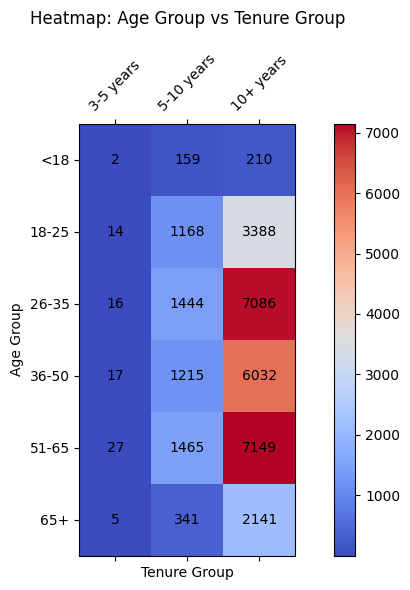

In [181]:
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(age_tenure_analysis, cmap='coolwarm')

# Add colorbar
fig.colorbar(cax)

# Add labels to the axes
ax.set_xticks(range(len(age_tenure_analysis.columns)))
ax.set_yticks(range(len(age_tenure_analysis.index)))
ax.set_xticklabels(age_tenure_analysis.columns, rotation=45)
ax.set_yticklabels(age_tenure_analysis.index)

# Add title and labels
ax.set_title('Heatmap: Age Group vs Tenure Group', pad=20)
ax.set_xlabel('Tenure Group')
ax.set_ylabel('Age Group')

# Annotate the cells with values
for (i, j), val in np.ndenumerate(age_tenure_analysis.values):
    ax.text(j, i, int(val) if not np.isnan(val) else '', ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()